In [ ]:
import torch
import matplotlib.pyplot as plt
from torchvision import models, transforms
from PIL import Image, ImageDraw


In [ ]:
# Carregar o modelo SSD pré-treinado
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 111MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
# Preparar imagem
img = Image.open("./imagem_teste.jpg")
transform = transforms.Compose([transforms.ToTensor()])
img_tensor = transform(img).unsqueeze(0)

In [ ]:
# Realizar a detecção
with torch.no_grad():
    prediction = model(img_tensor)

In [ ]:
# Definir um limiar de confiança (threshold) para melhorar as detecções
confidence_threshold = 0.8  # Apenas detectar se a confiança for maior que 80%

In [ ]:
# Desenhar as caixas delimitadoras
draw = ImageDraw.Draw(img)
for element, score in zip(prediction[0]['boxes'], prediction[0]['scores']):
    if score > confidence_threshold:  # Verificar a confiança da predição
        x1, y1, x2, y2 = element
        draw.rectangle([x1, y1, x2, y2], outline="red", width=3)

In [ ]:
#Salvar imagem com a marcação dos rostos detectados
img.save("./resultado.jpg")

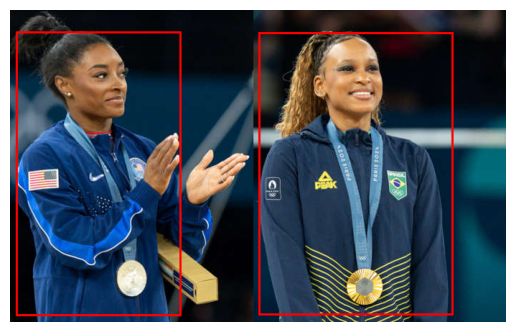

In [ ]:
# Exibir imagem
img.show()

# Exibir a imagem usando matplotlib
plt.imshow(img)
plt.axis('off')  # Para não mostrar os eixos
plt.show()